
📊 Confidence Interval Calculator with Clean Plots

Choose CI type:
1 - One-sample mean (σ known or unknown)
2 - Variance / Std deviation
3 - Proportion
4 - Two-sample independent
5 - Paired samples
0 - Exit
Enter choice (0-5): 1
Enter confidence level (e.g., 0.95 for 95%): 0.75
Enter sample data (space-separated): 11 12 13 14 15 16
Do you know population σ? (y/n): n
CI: (12.506, 14.494)
With 75.0% confidence, the true mean lies between 12.506 and 14.494.


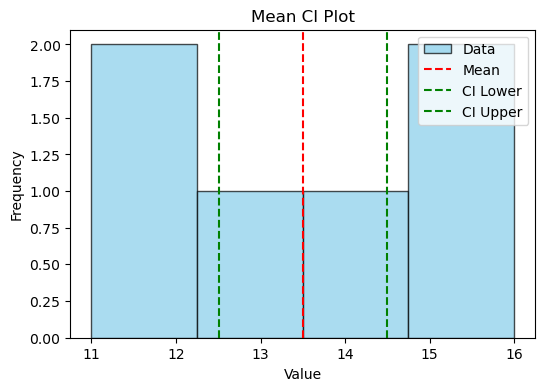

Do you want to calculate another CI? (y/n): n
Do you want to save all results to CSV? (y/n): n
Do you want to plot all CIs together? (y/n): y


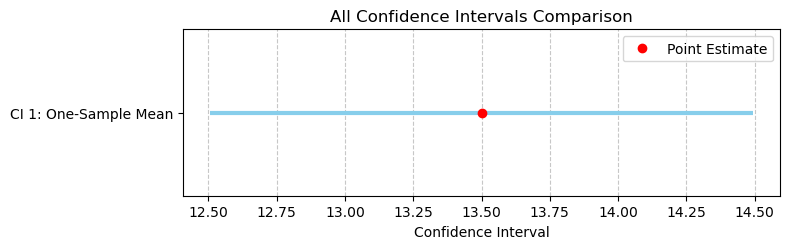

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CI Functions ----------

def z_confidence_interval(data=None, mean=None, n=None, sigma=None, confidence=0.95):
    if data is not None:
        mean = np.mean(data)
        n = len(data)
    alpha = 1 - confidence
    z_score = stats.norm.ppf(1 - alpha/2)
    margin_error = z_score * sigma / np.sqrt(n)
    lower, upper = mean - margin_error, mean + margin_error
    interp = f"With {confidence*100:.1f}% confidence, the true mean lies between {lower:.3f} and {upper:.3f}."
    return lower, upper, interp, mean

def t_confidence_interval(data=None, mean=None, n=None, s=None, confidence=0.95):
    if data is not None:
        mean = np.mean(data)
        s = np.std(data, ddof=1)
        n = len(data)
    alpha = 1 - confidence
    t_score = stats.t.ppf(1 - alpha/2, df=n-1)
    margin_error = t_score * s / np.sqrt(n)
    lower, upper = mean - margin_error, mean + margin_error
    interp = f"With {confidence*100:.1f}% confidence, the true mean lies between {lower:.3f} and {upper:.3f}."
    return lower, upper, interp, mean

def chi2_confidence_interval(data=None, s=None, n=None, confidence=0.95):
    if data is not None:
        s = np.std(data, ddof=1)
        n = len(data)
    alpha = 1 - confidence
    df = n - 1
    chi2_lower = stats.chi2.ppf(alpha/2, df)
    chi2_upper = stats.chi2.ppf(1 - alpha/2, df)
    var_lower = (df * s**2) / chi2_upper
    var_upper = (df * s**2) / chi2_lower
    sd_lower, sd_upper = np.sqrt(var_lower), np.sqrt(var_upper)
    interp = (f"With {confidence*100:.1f}% confidence, the population variance lies between "
              f"{var_lower:.3f} and {var_upper:.3f}, and the standard deviation between "
              f"{sd_lower:.3f} and {sd_upper:.3f}.")
    return (var_lower, var_upper), (sd_lower, sd_upper), interp, np.mean(data)

def proportion_confidence_interval(successes, n, confidence=0.95):
    p_hat = successes / n
    alpha = 1 - confidence
    z_score = stats.norm.ppf(1 - alpha/2)
    margin_error = z_score * np.sqrt(p_hat * (1 - p_hat) / n)
    lower = max(0, p_hat - margin_error)
    upper = min(1, p_hat + margin_error)
    interp = f"With {confidence*100:.1f}% confidence, the true proportion lies between {lower:.3f} and {upper:.3f}."
    return lower, upper, interp, p_hat

def two_sample_confidence_interval(x1, x2, equal_var=True, confidence=0.95):
    n1, n2 = len(x1), len(x2)
    mean1, mean2 = np.mean(x1), np.mean(x2)
    var1, var2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
    alpha = 1 - confidence
    if equal_var:
        sp2 = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
        se = np.sqrt(sp2 * (1/n1 + 1/n2))
        df = n1 + n2 - 2
    else:
        se = np.sqrt(var1/n1 + var2/n2)
        df = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    t_score = stats.t.ppf(1 - alpha/2, df)
    margin_error = t_score * se
    lower, upper = (mean1 - mean2) - margin_error, (mean1 - mean2) + margin_error
    interp = f"With {confidence*100:.1f}% confidence, the true difference in means lies between {lower:.3f} and {upper:.3f}."
    return lower, upper, interp, mean1, mean2, margin_error

def paired_sample_confidence_interval(x1, x2, confidence=0.95):
    if len(x1) != len(x2):
        raise ValueError("Both samples must have the same length for paired CI.")
    differences = np.array(x1) - np.array(x2)
    n = len(differences)
    mean_diff = np.mean(differences)
    sd_diff = np.std(differences, ddof=1)
    alpha = 1 - confidence
    t_score = stats.t.ppf(1 - alpha/2, df=n-1)
    margin_error = t_score * sd_diff / np.sqrt(n)
    lower, upper = mean_diff - margin_error, mean_diff + margin_error
    interp = f"With {confidence*100:.1f}% confidence, the true mean difference lies between {lower:.3f} and {upper:.3f}."
    return lower, upper, interp, differences, mean_diff

# ---------- Plot Functions ----------

def plot_mean_ci(data, lower, upper, title="Mean CI Plot"):
    mean_val = np.mean(data)
    plt.figure(figsize=(6,4))
    plt.hist(data, bins='auto', alpha=0.7, color='skyblue', edgecolor='black', label='Data')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(lower, color='green', linestyle='--', label='CI Lower')
    plt.axvline(upper, color='green', linestyle='--', label='CI Upper')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

def plot_two_sample_ci(mean1, mean2, margin_error, title="Two-Sample CI"):
    plt.figure(figsize=(6,4))
    plt.bar([0,1], [mean1, mean2], color=['skyblue','orange'], yerr=[margin_error, margin_error], capsize=10)
    plt.xticks([0,1], ['Sample 1', 'Sample 2'])
    plt.ylabel("Mean ± CI")
    plt.title(title)
    plt.show()

def plot_paired_ci(differences, lower, upper, title="Paired Differences CI"):
    plt.figure(figsize=(6,4))
    plt.hist(differences, bins='auto', alpha=0.7, color='skyblue', edgecolor='black', label='Differences')
    plt.axvline(lower, color='green', linestyle='--', label='CI Lower')
    plt.axvline(upper, color='green', linestyle='--', label='CI Upper')
    plt.axvline(np.mean(differences), color='red', linestyle='--', label='Mean Diff')
    plt.title(title)
    plt.xlabel("Difference")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

def plot_all_cis(all_results):
    if not all_results:
        print("No results to plot.")
        return

    plt.figure(figsize=(8, len(all_results)*0.6 + 2))
    
    y_labels = []
    lower_bounds = []
    upper_bounds = []
    point_estimates = []

    ci_type_dict = {
        "1": "One-Sample Mean",
        "2": "Variance/Std Dev",
        "3": "Proportion",
        "4": "Two-Sample Independent",
        "5": "Paired Samples"
    }

    for i, res in enumerate(all_results):
        y_labels.append(f"CI {i+1}: {ci_type_dict.get(res['CI_Type'], res['CI_Type'])}")
        lower_bounds.append(res['Lower'])
        upper_bounds.append(res['Upper'])
        point_estimates.append((res['Lower'] + res['Upper'])/2)

    plt.hlines(y=range(len(all_results)), xmin=lower_bounds, xmax=upper_bounds, color='skyblue', linewidth=3)
    plt.plot(point_estimates, range(len(all_results)), 'ro', label='Point Estimate')
    plt.yticks(range(len(all_results)), y_labels)
    plt.xlabel("Confidence Interval")
    plt.title("All Confidence Intervals Comparison")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- Interactive CLI ----------

def get_list_input(prompt):
    while True:
        try:
            return list(map(float, input(prompt).split()))
        except:
            print("Invalid input. Enter numbers separated by spaces.")

def main():
    all_results = []

    print("\n📊 Confidence Interval Calculator with Clean Plots")
    while True:
        print("\nChoose CI type:")
        print("1 - One-sample mean (σ known or unknown)")
        print("2 - Variance / Std deviation")
        print("3 - Proportion")
        print("4 - Two-sample independent")
        print("5 - Paired samples")
        print("0 - Exit")
        choice = input("Enter choice (0-5): ")
        if choice == "0":
            break

        confidence = float(input("Enter confidence level (e.g., 0.95 for 95%): "))

        if choice == "1":
            data = get_list_input("Enter sample data (space-separated): ")
            sigma_input = input("Do you know population σ? (y/n): ")
            if sigma_input.lower() == 'y':
                sigma = float(input("Enter σ: "))
                lower, upper, interp, mean_val = z_confidence_interval(data, sigma=sigma, confidence=confidence)
            else:
                lower, upper, interp, mean_val = t_confidence_interval(data, confidence=confidence)
            print(f"CI: ({lower:.3f}, {upper:.3f})\n{interp}")
            plot_mean_ci(data, lower, upper)

        elif choice == "2":
            data = get_list_input("Enter sample data (space-separated): ")
            var_ci, sd_ci, interp, mean_val = chi2_confidence_interval(data, confidence=confidence)
            print(f"Variance CI: ({var_ci[0]:.3f}, {var_ci[1]:.3f})")
            print(f"Std Dev CI: ({sd_ci[0]:.3f}, {sd_ci[1]:.3f})")
            print(interp)
            plot_mean_ci(data, sd_ci[0], sd_ci[1], title="Std Dev CI Overlay")

        elif choice == "3":
            successes = int(input("Enter number of successes: "))
            n = int(input("Enter total sample size: "))
            lower, upper, interp, p_hat = proportion_confidence_interval(successes, n, confidence=confidence)
            print(f"CI: ({lower:.3f}, {upper:.3f})\n{interp}")
            plt.figure(figsize=(6,4))
            plt.bar(0, p_hat, yerr=[[p_hat - lower],[upper - p_hat]], color='skyblue', capsize=10)
            plt.xticks([0], ["Proportion"])
            plt.ylabel("Proportion ± CI")
            plt.title("Proportion CI")
            plt.show()

        elif choice == "4":
            x1 = get_list_input("Enter sample 1 data (space-separated): ")
            x2 = get_list_input("Enter sample 2 data (space-separated): ")
            equal_var = input("Assume equal variance? (y/n): ").lower() == 'y'
            lower, upper, interp, mean1, mean2, margin_error = two_sample_confidence_interval(x1, x2, equal_var, confidence=confidence)
            print(f"CI: ({lower:.3f}, {upper:.3f})\n{interp}")
            plot_two_sample_ci(mean1, mean2, margin_error)

        elif choice == "5":
            x1 = get_list_input("Enter paired sample 1 data (space-separated): ")
            x2 = get_list_input("Enter paired sample 2 data (space-separated): ")
            lower, upper, interp, differences, mean_diff = paired_sample_confidence_interval(x1, x2, confidence=confidence)
            print(f"CI: ({lower:.3f}, {upper:.3f})\n{interp}")
            plot_paired_ci(differences, lower, upper)

        all_results.append({
            "CI_Type": choice,
            "Lower": lower,
            "Upper": upper,
            "Interpretation": interp
        })

        continue_choice = input("Do you want to calculate another CI? (y/n): ")
        if continue_choice.lower() != 'y':
            break

    export_choice = input("Do you want to save all results to CSV? (y/n): ")
    if export_choice.lower() == 'y':
        df = pd.DataFrame(all_results)
        df.to_csv("ci_results.csv", index=False)
        print("Results saved to ci_results.csv")

    dashboard_choice = input("Do you want to plot all CIs together? (y/n): ")
    if dashboard_choice.lower() == 'y':
        plot_all_cis(all_results)

if __name__ == "__main__":
    main()
